In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
from math import sqrt

# Bar Graph

In [55]:
sets = ["SG_2.txt", "SA_2.txt", "FC_2.txt", "NF_2.txt"]

nested_enc = np.empty((4, 10, 2))
wm = np.empty((4,10,2))

nested_words_mean = []
nested_letters_mean = []
wm_words_mean = []
wm_letters_mean = []
for i in range(4):
    nested_enc[i] = np.loadtxt("*_nested_acc_" + sets[i], dtype=object).reshape(10,2,2)[:,:,1].astype(np.float32)
    wm[i] = np.loadtxt("*_wm_acc_" + sets[i], dtype=object).reshape(10,2,2)[:,:,1].astype(np.float32)
    
    nested_words_mean.append(np.mean(nested_enc[i,:,0]))
    nested_letters_mean.append(np.mean(nested_enc[i,:,1]))
    wm_words_mean.append(np.mean(wm[i,:,0]))
    wm_letters_mean.append(np.mean(wm[i,:,1]))
    
nested_words = nested_enc[:,:,0]
nested_letters = nested_enc[:,:,1]
wm_words = wm[:,:,0]
wm_letters = wm[:,:,1]

nested_letters_ci = []
nested_words_ci = []
wm_letters_ci = []
wm_words_ci = []

for i in range(4):
    nested_letters_ci.append((np.std(nested_letters[i,:])/sqrt(10)) * 1.96)
    nested_words_ci.append((np.std(nested_words[i,:])/sqrt(10)) * 1.96)
    wm_letters_ci.append((np.std(wm_letters[i,:])/sqrt(10)) * 1.96)
    wm_words_ci.append((np.std(wm_words[i,:])/sqrt(10)) * 1.96)
    
    

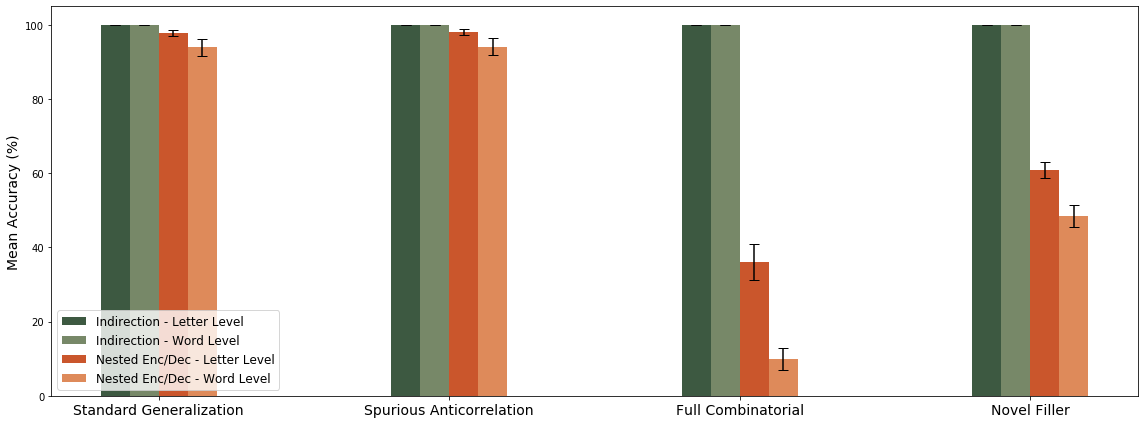

In [91]:
labels = ["Standard Generalization", "Spurious Anticorrelation", "Full Combinatorial", "Novel Filler"]

x = np.arange(len(labels))
width = .10

fig, ax = plt.subplots(figsize=(16,6))
ax.bar(x-width*1.5, wm_letters_mean, width, yerr=wm_letters_ci, capsize=5, label="Indirection - Letter Level", color="#3d5941")
ax.bar(x-width/2, wm_words_mean, width, yerr=wm_words_ci, capsize=5, label="Indirection - Word Level", color = "#778868")
ax.bar(x+width/2, nested_letters_mean, width, yerr=nested_letters_ci, capsize=5, label="Nested Enc/Dec - Letter Level", color="#ca562c")
ax.bar(x+width*1.5, nested_words_mean, width, yerr=nested_words_ci, capsize=5, label="Nested Enc/Dec - Word Level", color="#de8a5a")


ax.set_ylabel('Mean Accuracy (%)',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(loc="lower left",fontsize=12)

fig.tight_layout()
plt.savefig("Mean_Accuracy_Bargraph.png")
plt.show()

# Box Plot

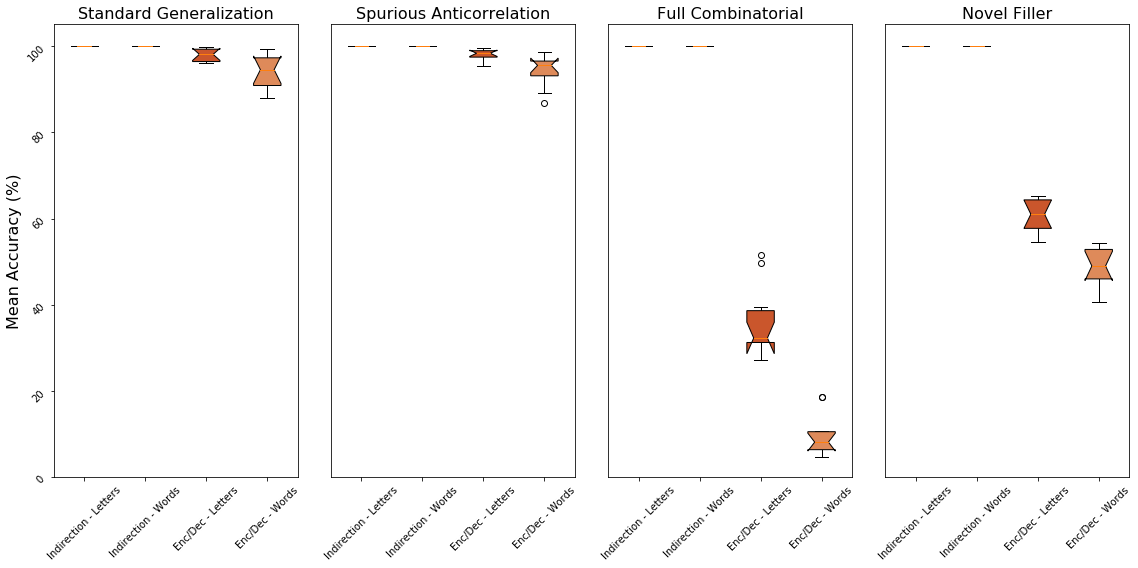

In [95]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
labels = ["Indirection - Letters", "Indirection - Words", "Enc/Dec - Letters", "Enc/Dec - Words"]

# rectangular box plot
bplot1 = ax1.boxplot([wm_letters[0], wm_words[0], nested_letters[0], nested_words[0]],
                     vert=True,  # vertical box alignment
                     notch=True,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_ylim(0,105)
ax1.tick_params(labelrotation=45)
ax1.set_title('Standard Generalization',fontsize=16)
ax1.set_ylabel('Mean Accuracy (%)',fontsize=16)



bplot2 = ax2.boxplot([wm_letters[1], wm_words[1], nested_letters[1], nested_words[1]],
                     vert=True,  # vertical box alignment
                     notch=True,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_ylim(0,105)
ax2.set_yticks([])
ax2.tick_params(labelrotation=45)
ax2.set_title('Spurious Anticorrelation',fontsize=16)


bplot3 = ax3.boxplot([wm_letters[2], wm_words[2], nested_letters[2], nested_words[2]],
                     vert=True,  # vertical box alignment
                     notch=True,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax3.set_ylim(0,105)
ax3.set_yticks([])
ax3.tick_params(labelrotation=45)
ax3.set_title('Full Combinatorial',fontsize=16)


bplot4 = ax4.boxplot([wm_letters[3], wm_words[3], nested_letters[3], nested_words[3]],
                     vert=True,  # vertical box alignment
                     notch=True,
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.set_ylim(0,105)
ax4.set_yticks([])
ax4.tick_params(labelrotation=45)
ax4.set_title('Novel Filler',fontsize=16)

# fill with colors
colors = ['#3d5941', '#778868', '#ca562c', '#de8a5a']
for bplot in (bplot1, bplot2, bplot3, bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
fig.tight_layout()
plt.savefig("Mean_Accuracy_Boxplot.png")
plt.show()